In [2]:
pip install mlrose

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=f5966c63a78632a709066c299a3bcad96b094b70144323f1ddcb3287c17d5aa8
  Stored in directory: /home/sophie/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [1]:
import mlrose as ml
import numpy as np
import time
import matplotlib.pyplot as plt

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
def plot_4_graphs(param, curves, title="", param_name="", curve_name="", x_range=(1,100), y_range=(0.5,1)):
    plt.figure()
    y1, = plt.plot(param, curves[0,:],ls='-', marker='+' , color='blue')
    y2, = plt.plot(param, curves[1,:],ls='-', marker='+', color='red')
    y3, = plt.plot(param, curves[2,:], ls='-', marker='+', color='green')
    y4, = plt.plot(param, curves[3,:], ls='-', marker='+', color='yellow')
    
    # plt.xlim(x_range)
    # plt.ylim(y_range)
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    plt.title=title
    
    plt.legend(handles=[y1,y2,y3,y4],labels=['RHC', 'SA', 'GA','MIMIC'], loc='best')
    
    plt.show()

In [3]:
def plot_graph(param, curves, param_name="", curve_name=""):
    plt.figure()
    plt.plot(param, curves, ls='-', marker='o' , color='blue')
    
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.show()

In [4]:
# init params for problem
iter_size = [1,2,3,5,10,20,30,50,100]
l_iter = len(iter_size)

In [6]:
fitness = ml.FlipFlop()
problem_fit = ml.DiscreteOpt(length=50, fitness_fn=fitness, maximize=True, max_val=2)

In [7]:
def rhcAlgo(ft=problem_fit, it=1000, res=0, maxatt=10):
    t0 = time.time()
    best_state, best_fitness= ml.random_hill_climb(ft, max_attempts = maxatt, max_iters=it, restarts=res,
                                                           random_state = 2)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [8]:
geom = ml.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)
arith = ml.ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
exp = ml.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001)

In [9]:
def SA(ft=problem_fit, it=1000, mut=0.1, maxatt=10, sch=geom):
    t0 = time.time()
    best_state, best_fitness, curve = ml.simulated_annealing(ft, max_attempts = maxatt, max_iters=it, schedule=sch,
                                                             random_state = 2,curve=True)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [10]:
def GA(ft=problem_fit, it=1000, pop=200, mut=0.15, maxatt=10):
    t0 = time.time()
    best_state, best_fitness, curve = ml.genetic_alg(ft, pop_size=pop, mutation_prob=mut, max_attempts=maxatt, 
                                                     max_iters=it, random_state = 2,curve=True)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [11]:
def mimicAlgo(ft=problem_fit, it=1000, pop=200, maxatt=10, pct=0.1):
    t0 = time.time()
    best_state, best_fitness, curve = ml.mimic(ft, pop_size=pop, keep_pct=pct, max_attempts=maxatt, max_iters=it, 
                                               random_state = 2,curve=True)
    dt = time.time() - t0
    
    perform = np.zeros((1,2))
    perform[0,0] = best_fitness
    perform[0,1] = dt
    return best_fitness, dt

In [15]:
pop_size = [10, 20, 50, 100, 200, 500, 600, 1000]
l_pop = len(pop_size)

perfs_mimic_pop = np.zeros((1, l_pop))
times_mimic_pop = np.zeros((1, l_pop))
for i in range(l_pop):
    perfs_mimic_pop[0, i], times_mimic_pop[0, i] = mimicAlgo(ft=problem_fit, it=50, pop=pop_size[i])

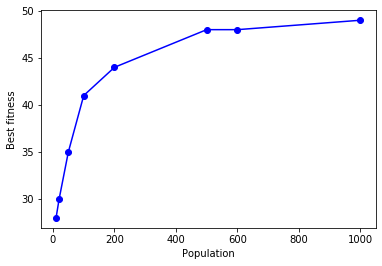

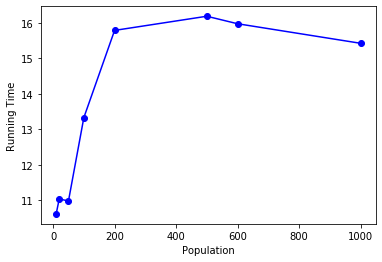

In [16]:
plot_graph(pop_size, perfs_mimic_pop[0,:], param_name="Population", curve_name="Best fitness")
plot_graph(pop_size, times_mimic_pop[0,:], param_name="Population", curve_name="Running Time")

In [19]:
keep_size = [0.1, 0.15, 0.2, 0.25, 0.3,0.35, 0.4, 0.45, 0.5, 0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
l_keep = len(keep_size)

perfs_mimic_keep = np.zeros((1, l_keep))
times_mimic_keep = np.zeros((1, l_keep))
for i in range(l_keep):
    perfs_mimic_keep[0, i], times_mimic_keep[0, i] = mimicAlgo(ft=problem_fit, it=50, pct=keep_size[i], maxatt=100)

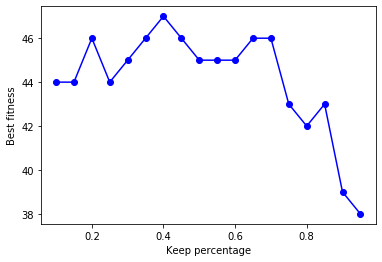

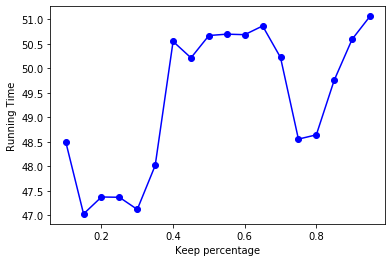

In [20]:
plot_graph(keep_size, perfs_mimic_keep[0,:], param_name="Keep percentage", curve_name="Best fitness")
plot_graph(keep_size, times_mimic_keep[0,:], param_name="Keep percentage", curve_name="Running Time")

In [12]:
# comparaison iter size
perfs_4_algo = np.zeros((4, l_iter))
times_4_algo = np.zeros((4, l_iter))
for i in range(l_iter):
    perfs_4_algo[0,i], times_4_algo[0,i] = rhcAlgo(ft=problem_fit, it=iter_size[i],res=10, maxatt=100)
    perfs_4_algo[1,i], times_4_algo[1,i] = SA(ft=problem_fit, it=iter_size[i], maxatt=100)
    perfs_4_algo[2,i], times_4_algo[2,i] = GA(ft=problem_fit, it=iter_size[i], maxatt=100)
    perfs_4_algo[3,i], times_4_algo[3,i] = mimicAlgo(ft=problem_fit, it=iter_size[i], maxatt=100)

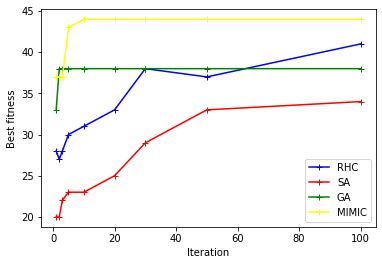

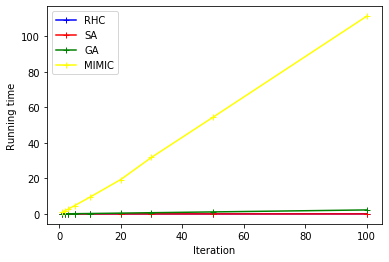

In [13]:
plot_4_graphs(iter_size, perfs_4_algo, param_name="Iteration", curve_name="Best fitness")
plot_4_graphs(iter_size, times_4_algo, param_name="Iteration", curve_name="Running time")

In [15]:
print(perfs_4_algo)
print(times_4_algo)

[[147.   0.   0. 126.   0.   0.   0. 185.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 162.]
 [208. 226. 230. 242. 242. 242. 242. 253. 253.]
 [184. 193. 207. 207. 233. 233. 233. 246. 246.]]
[[1.13272667e-03 1.16491318e-03 1.64985657e-03 2.58970261e-03
  4.09698486e-03 7.63559341e-03 1.29532814e-02 1.80718899e-02
  3.50942612e-02]
 [1.51157379e-04 1.72376633e-04 2.42710114e-04 3.99827957e-04
  6.55651093e-04 1.27410889e-03 1.95765495e-03 2.91490555e-03
  5.38754463e-03]
 [3.58483791e-02 5.49545288e-02 8.21766853e-02 1.35450363e-01
  2.37608194e-01 4.64426041e-01 7.26844072e-01 1.19511342e+00
  2.41510582e+00]
 [1.03935647e+00 2.19385862e+00 3.25161099e+00 5.48552895e+00
  1.02615933e+01 2.02878428e+01 3.05071225e+01 5.03134637e+01
  1.00621520e+02]]
